# Car Price Prediction (Linear Regression)

***

#### __Problem Statement__ 

##### A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.<br>They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

> -  Which variables are significant in predicting the price of a car
> -  How well those variables describe the price of a car

##### Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market.

In [3]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### __Reading and Understanding the Data__

***
***

<div style="color:grey">
<ol>
<li>Importing data using the pandas library
<li>Understanding the structure of the data
<ol>
<div>

In [4]:
cars = pd.read_csv('./CarPrice_Assignment.csv')
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
cars.shape

(205, 26)

In [8]:
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [9]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

##### __Data Cleaning and Preparation__

***
***

In [10]:
#Splitting company name from CarName column
CompanyName = cars['CarName'].apply(lambda x: x.split(' ')[0])
cars.insert(3, "CompanyName", CompanyName)
cars.drop(['CarName'], axis=1, inplace=True)
cars.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [11]:
cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

<b>Fixing invalid values

- `` maxda = mazda ``
- `` Nissan = nissan ``
- `` porsche = porcshce ``
- `` toyota = toyouta ``
- `` vokswagen = volkswagen = vw ``

In [12]:
cars.CompanyName = cars.CompanyName.str.lower()


def replace_name(a, b):
    cars.CompanyName.replace(a, b, inplace=True)


replace_name('maxda', 'mazda')
replace_name('porcshce', 'porsche')
replace_name('toyouta', 'toyota')
replace_name('vokswagen', 'volkswagen')
replace_name('vw', 'volkswagen')

cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [13]:
#Checking for duplicates
cars.loc[cars.duplicated()]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [14]:
cars.columns

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

##### __Visualizing the data__

***
---

### __Distribution Plot and Box Plot__


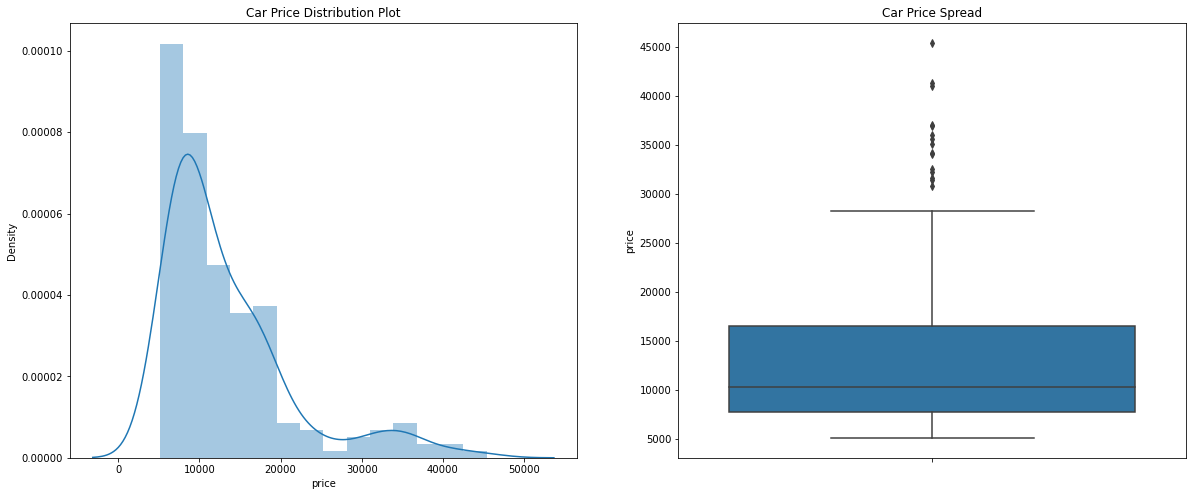

In [15]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
plt.title('Car Price Distribution Plot')
sns.distplot(cars.price)

plt.subplot(1, 2, 2)
plt.title('Car Price Spread')
sns.boxplot(y=cars.price)

plt.show()

In [16]:
print(cars.price.describe(percentiles=[0.25, 0.50, 0.75, 0.85, 0.90, 1]))

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


##### Inference :

<div style = "color:grey" >
<ol>
<li> The plot seemed to be right-skewed, meaning that the most prices in the dataset are low(Below 15,000).
<li> There is a significant difference between the mean and the median of the price distribution.
<li> The data points are far spread out from the mean, which indicates a high variance in the car prices.(85% of the prices are below 18,500, whereas the remaining 15% are between 18,500 and 45,400.)
<ol>
<div>


##### <b> 1. Visualising Categorical Data

***
***

### __Histograms__

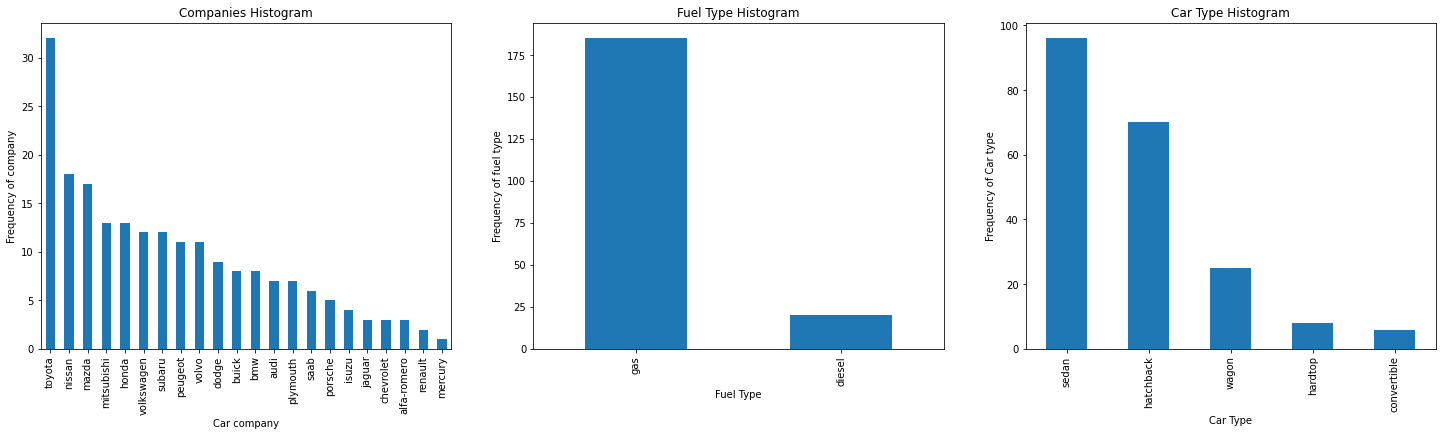

In [31]:
plt.figure(figsize=(25, 6))

plt.subplot(1, 3, 1)
plt1 = cars.CompanyName.value_counts().plot.bar()
plt.title('Companies Histogram')
plt1.set(xlabel='Car company', ylabel='Frequency of company')

plt.subplot(1, 3, 2)
plt1 = cars.fueltype.value_counts().plot.bar()
plt.title('Fuel Type Histogram')
plt1.set(xlabel='Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1, 3, 3)
plt1 = cars.carbody.value_counts().plot.bar()
plt.title('Fuel Type Histogram')
plt1.set(xlabel='Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1, 3, 3)
plt1 = cars.carbody.value_counts().plot.bar()
plt.title('Car Type Histogram')
plt1.set(xlabel='Car Type', ylabel='Frequency of Car type')

plt.show()


##### Inference :

<div style="color:grey">
<ol>
<li> <code>Toyota</code> seemed to be favored car company.
<li> Number of gas fueled cars are more than diesel.
<li> <code>sedan</code>  is the top car type prefered.
<ol>
<div>

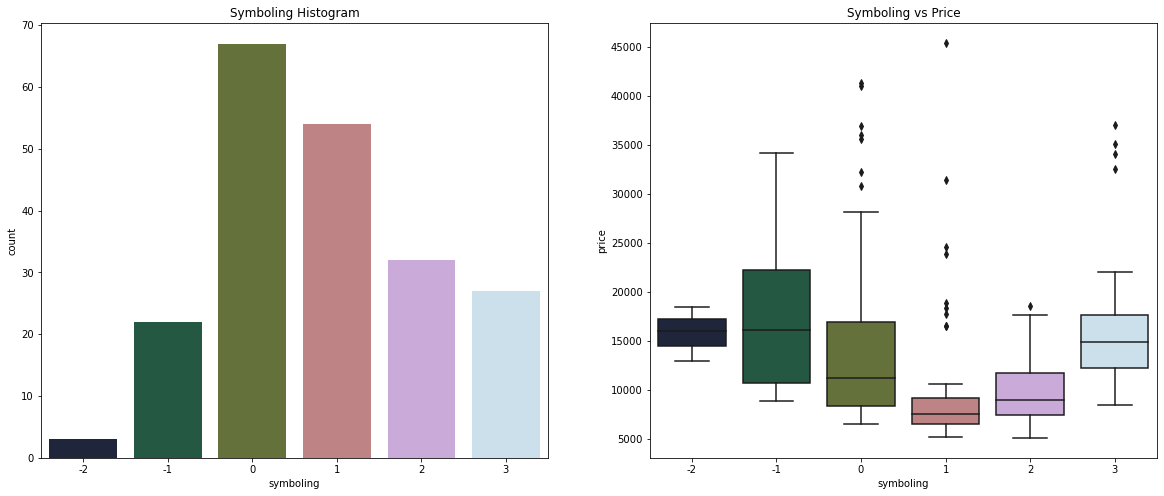

In [32]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
plt.title('Symboling Histogram')
sns.countplot(cars.symboling, palette=("cubehelix"))

plt.subplot(1, 2, 2)
plt.title('Symboling vs Price')
sns.boxplot(x=cars.symboling, y=cars.price, palette=("cubehelix"))

plt.show()



##### Inference :

<div style = "color:grey" >
<ol>
<li> It seems that the symboling with 0 and 1 values have high number of rows (i.e. They are most sold.)
<li> The cars with -1 symboling seems to be high priced (as it makes sense too, insurance risk rating -1 is quite good). But it seems that symboling with 3 value has the price range similar to -2 value. There is a dip in price at symboling 1.
<div>

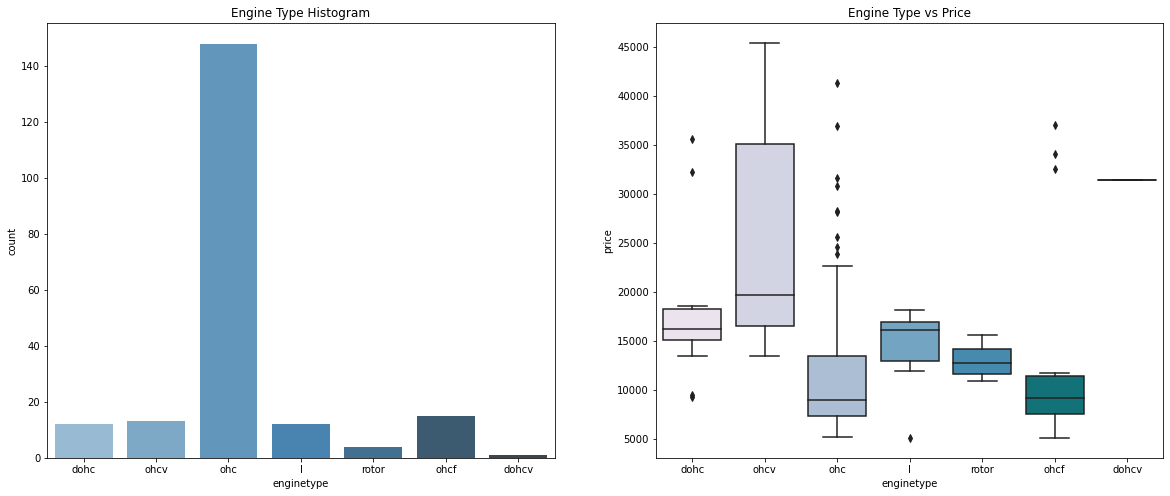

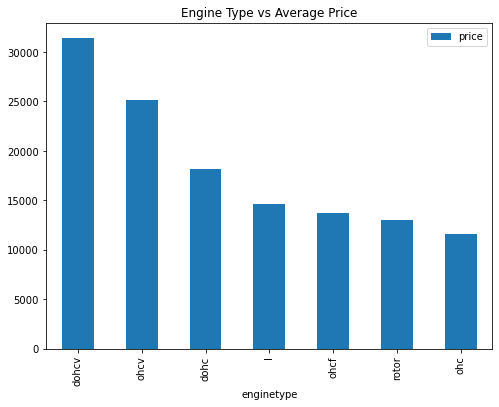

In [34]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
plt.title('Engine Type Histogram')
sns.countplot(cars.enginetype, palette=("Blues_d"))

plt.subplot(1, 2, 2)
plt.title('Engine Type vs Price')
sns.boxplot(x=cars.enginetype, y=cars.price, palette=("PuBuGn"))

plt.show()

df = pd.DataFrame(cars.groupby(['enginetype'])['price'].mean().sort_values(ascending=False))
df.plot.bar(figsize=(8, 6))
plt.title('Engine Type vs Average Price')
plt.show()


##### Inference :

<div style="color:grey">
<ol>
<li> <code>ohc</code> Engine type seems to be most favored type.
<li> <code>ohcv</code>  has the highest price range (While <code>dohcv</code> has only one row), <code>ohc</code> and <code>ohcf</code> have the low price range.
<ol>
<div>

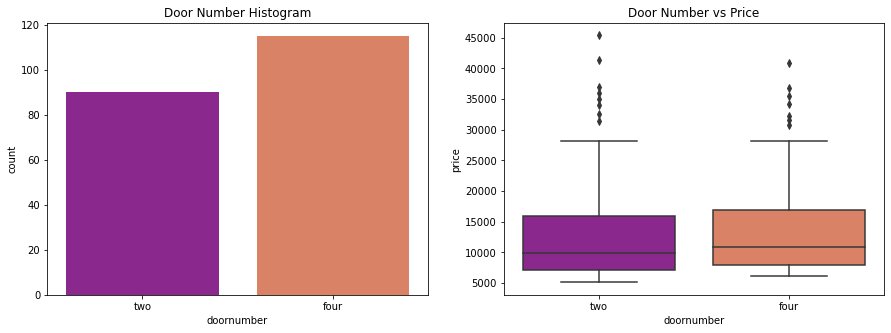

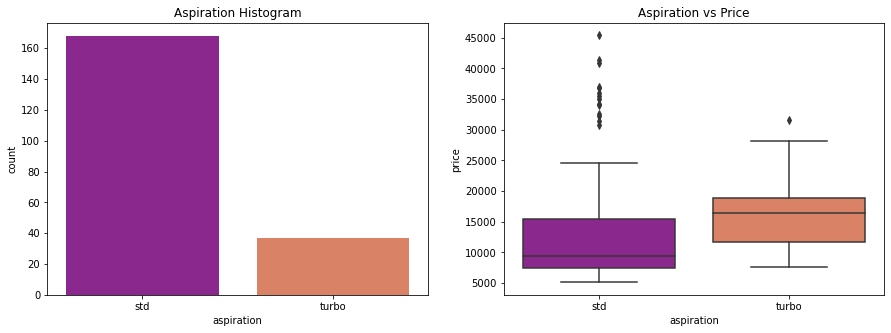

In [36]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.title('Door Number Histogram')
sns.countplot(cars.doornumber, palette=("plasma"))

plt.subplot(1, 2, 2)
plt.title('Door Number vs Price')
sns.boxplot(x=cars.doornumber, y=cars.price, palette=("plasma"))

plt.show()

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.title('Aspiration Histogram')
sns.countplot(cars.aspiration, palette=("plasma"))

plt.subplot(1, 2, 2)
plt.title('Aspiration vs Price')
sns.boxplot(x=cars.aspiration, y=cars.price, palette=("plasma"))

plt.show()


##### Inference :

<div style="color:grey">
<ol>
<li> <code>doornumber</code> variable is not affacting the price much. There is no sugnificant difference between the categories in it.
<li> It seems aspiration with <code>turbo</code> have higher price range than the <code>std</code> (though it has some high values outside the whiskers.)
<ol>
<div>

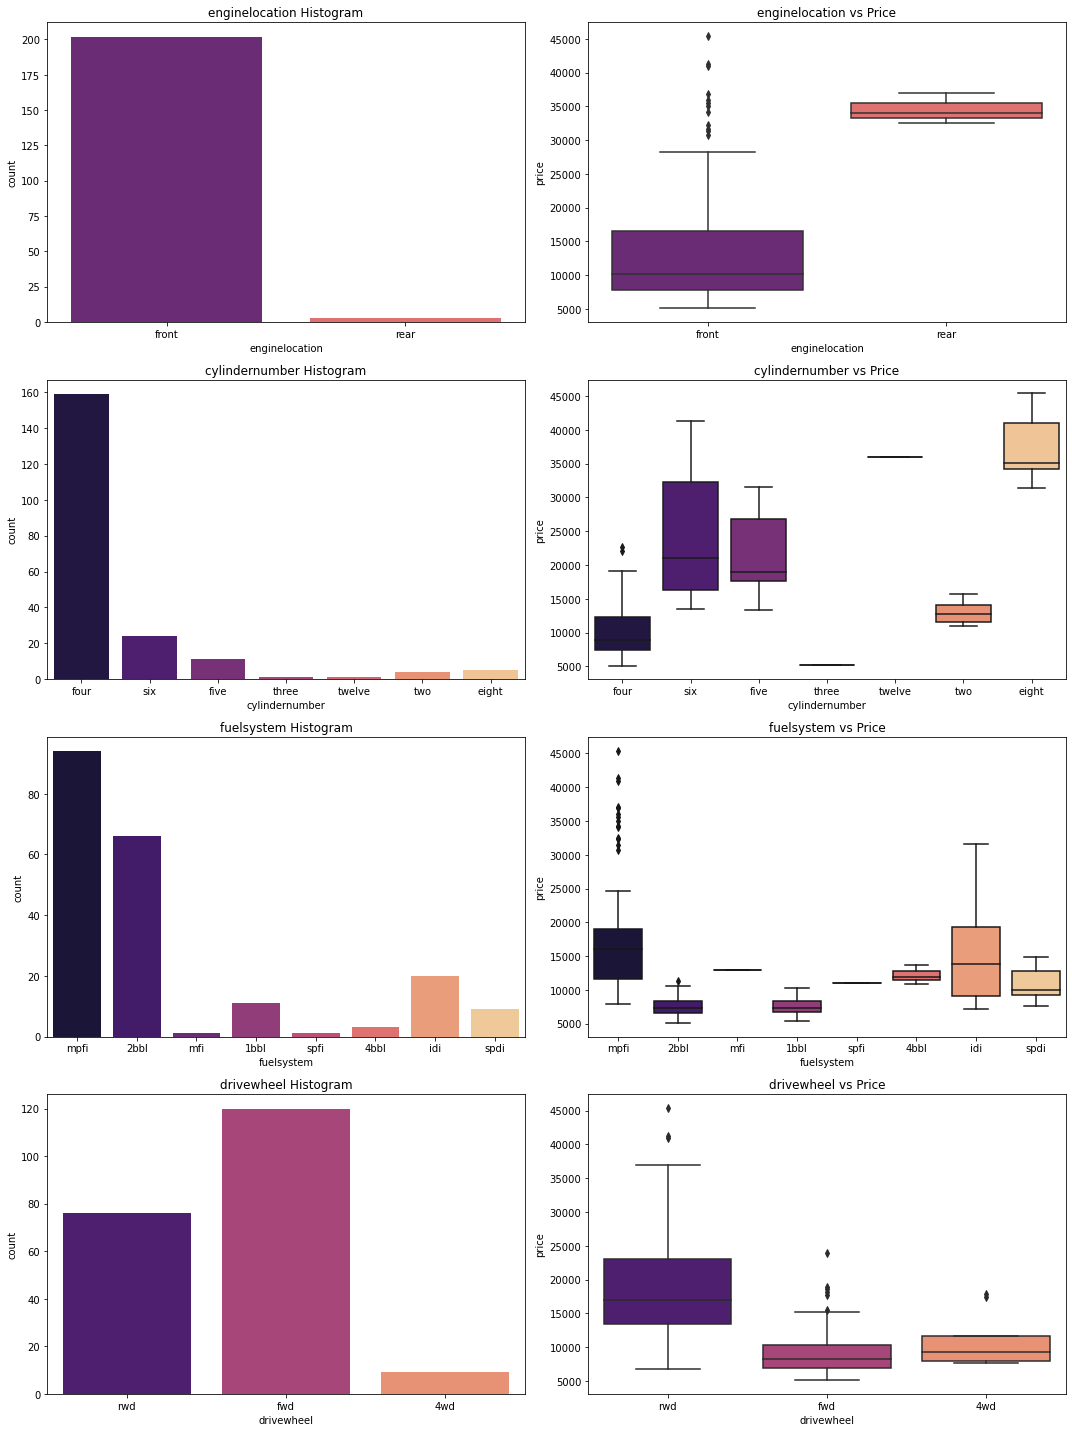

In [37]:
def plot_count(x, fig):
    plt.subplot(4, 2, fig)
    plt.title(x+' Histogram')
    sns.countplot(cars[x], palette=("magma"))
    plt.subplot(4, 2, (fig+1))
    plt.title(x+' vs Price')
    sns.boxplot(x=cars[x], y=cars.price, palette=("magma"))


plt.figure(figsize=(15, 20))

plot_count('enginelocation', 1)
plot_count('cylindernumber', 3)
plot_count('fuelsystem', 5)
plot_count('drivewheel', 7)

plt.tight_layout()


##### Inference :

<div style="color:grey">
<ol>
<li> Very few datapoints for <code>enginelocation</code> categories to make an inference.
<li> Most common number of cylinders are <code> four, six </code> and <code>five</code>. Though <code>eight</code> cylinders have the highest price range.
<li> <code>mpfi</code> and <code>2bbl</code> are most common type of fuel systems. <code>mpfi</code> and <code>idi</code> having the highest price range. But there are few data for other categories to derive any meaningful inference.
<li> A very significant difference in drivewheel category. Most high ranged cars seeme to prefer <code>rwd</code> drivewheel.
<ol>
<div>

##### <b>2. Visualising numerical data

***
***

### __Scatter Plot__

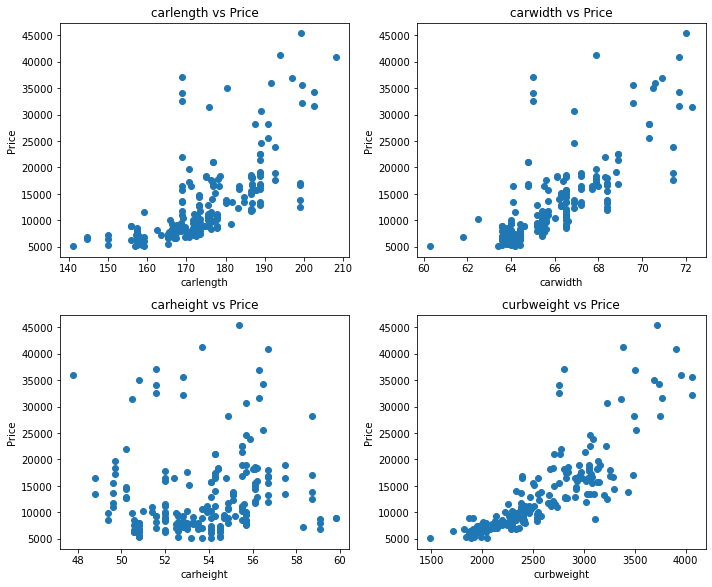

In [38]:
def scatter(x, fig):
    plt.subplot(5, 2, fig)
    plt.scatter(cars[x], cars['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)


plt.figure(figsize=(10, 20))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)

plt.tight_layout()


##### Inference :

<div style="color:grey">
<ol>
<li> <code>carwidth, carlength</code> and <code>curbweight</code> seems to have a poitive correlation with price.
<li> <code>carheight</code> doesn't show any significant trend with price.
<ol>
<div>

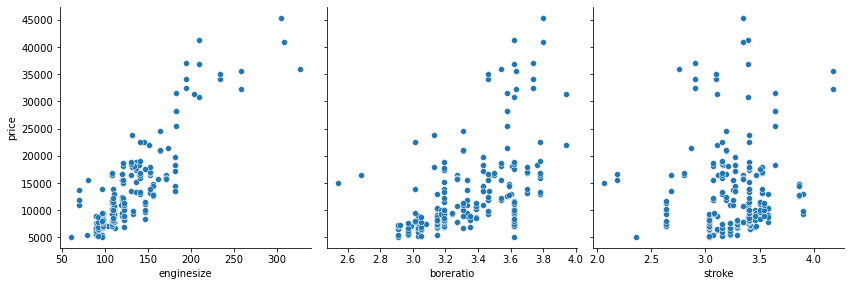

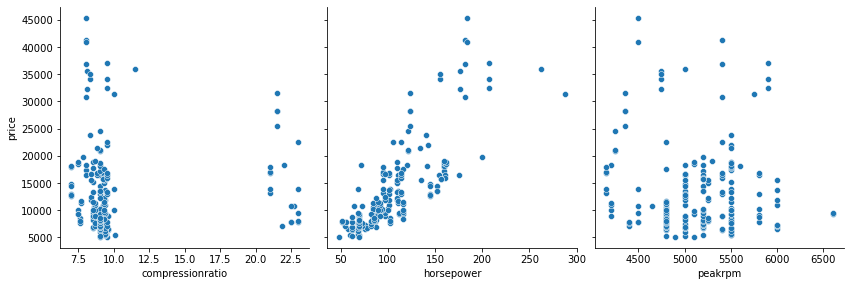

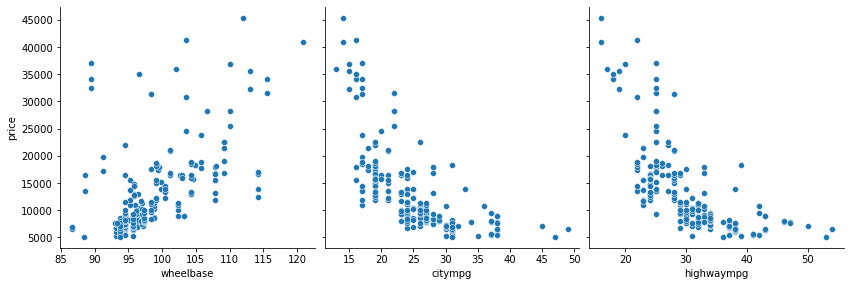

In [39]:
def pp(x, y, z):
    sns.pairplot(cars, x_vars=[x, y, z], y_vars='price', size=4, aspect=1, kind='scatter')
    plt.show()


pp('enginesize', 'boreratio', 'stroke')
pp('compressionratio', 'horsepower', 'peakrpm')
pp('wheelbase', 'citympg', 'highwaympg')


##### Inference : 

<div style="color:grey">
<ol>
<li> <code>enginesize, boreratio, horsepower, wheelbase</code> - seem to have a significant positive correlation with price.
<li> <code>citympg, highwaympg</code> - seem to have a significant negative correlation with price.
<ol>
<div>

In [40]:
np.corrcoef(cars['carlength'], cars['carwidth'])[0, 1]

0.841118268481846

##### __Deriving new features__

In [41]:
#Fuel economy
cars['fueleconomy'] = (0.55 * cars['citympg']) + (0.45 * cars['highwaympg'])


In [42]:
#Binning the Car Companies based on avg prices of each Company.
cars['price'] = cars['price'].astype('int')
temp = cars.copy()
table = temp.groupby(['CompanyName'])['price'].mean()
temp = temp.merge(table.reset_index(), how='left', on='CompanyName')
bins = [0, 10000, 20000, 40000]
cars_bin = ['Budget', 'Medium', 'Highend']
cars['carsrange'] = pd.cut(temp['price_y'], bins, right=False, labels=cars_bin)
cars.head()


,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy,carsrange
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495,23.70,Medium
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500,23.70,Medium
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500,22.15,Medium
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950,26.70,Medium
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450,19.80,Medium


##### __Bivariate Analysis__

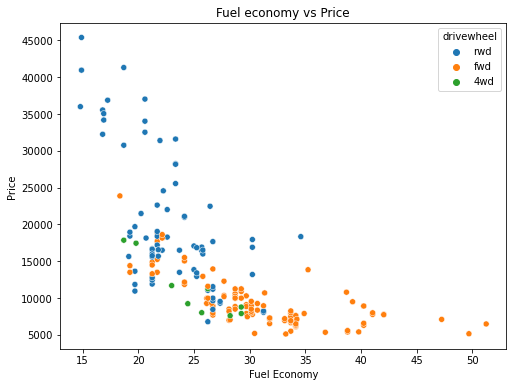

<Figure size 432x288 with 0 Axes>

In [43]:
plt.figure(figsize=(8, 6))

plt.title('Fuel economy vs Price')
sns.scatterplot(x=cars['fueleconomy'], y=cars['price'], hue=cars['drivewheel'])
plt.xlabel('Fuel Economy')
plt.ylabel('Price')

plt.show()
plt.tight_layout()

##### Inference :

<div style="color:grey">
<ol>
<li> <code>fueleconomy</code> has an obvios <code>negative correlation</code> with price and is significant.
<ol>
<div>

<Figure size 1800x432 with 0 Axes>

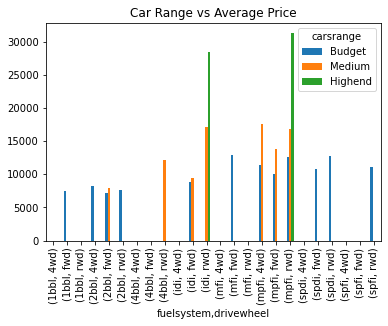

In [44]:
plt.figure(figsize=(25, 6))

df = pd.DataFrame(cars.groupby(['fuelsystem', 'drivewheel', 'carsrange'])['price'].mean().unstack(fill_value=0))
df.plot.bar()
plt.title('Car Range vs Average Price')
plt.show()

##### Inference :

<div style="color:grey">
<ol>
<li> High ranged cars prefer <code>rwd</code> drivewheel with <code>idi</code> or <code>mpfi</code> fuelsystem.
<ol>
<div>

In [46]:
cars_lr = cars[['price', 'fueltype', 'aspiration', 'carbody', 'drivewheel', 'wheelbase',
                'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio', 'horsepower',
                'fueleconomy', 'carlength', 'carwidth', 'carsrange']]
cars_lr.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,carsrange
0,13495,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium
1,16500,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium
2,16500,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,22.15,171.2,65.5,Medium
3,13950,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,26.70,176.6,66.2,Medium
4,17450,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,19.80,176.6,66.4,Medium


### __Pair Plot__

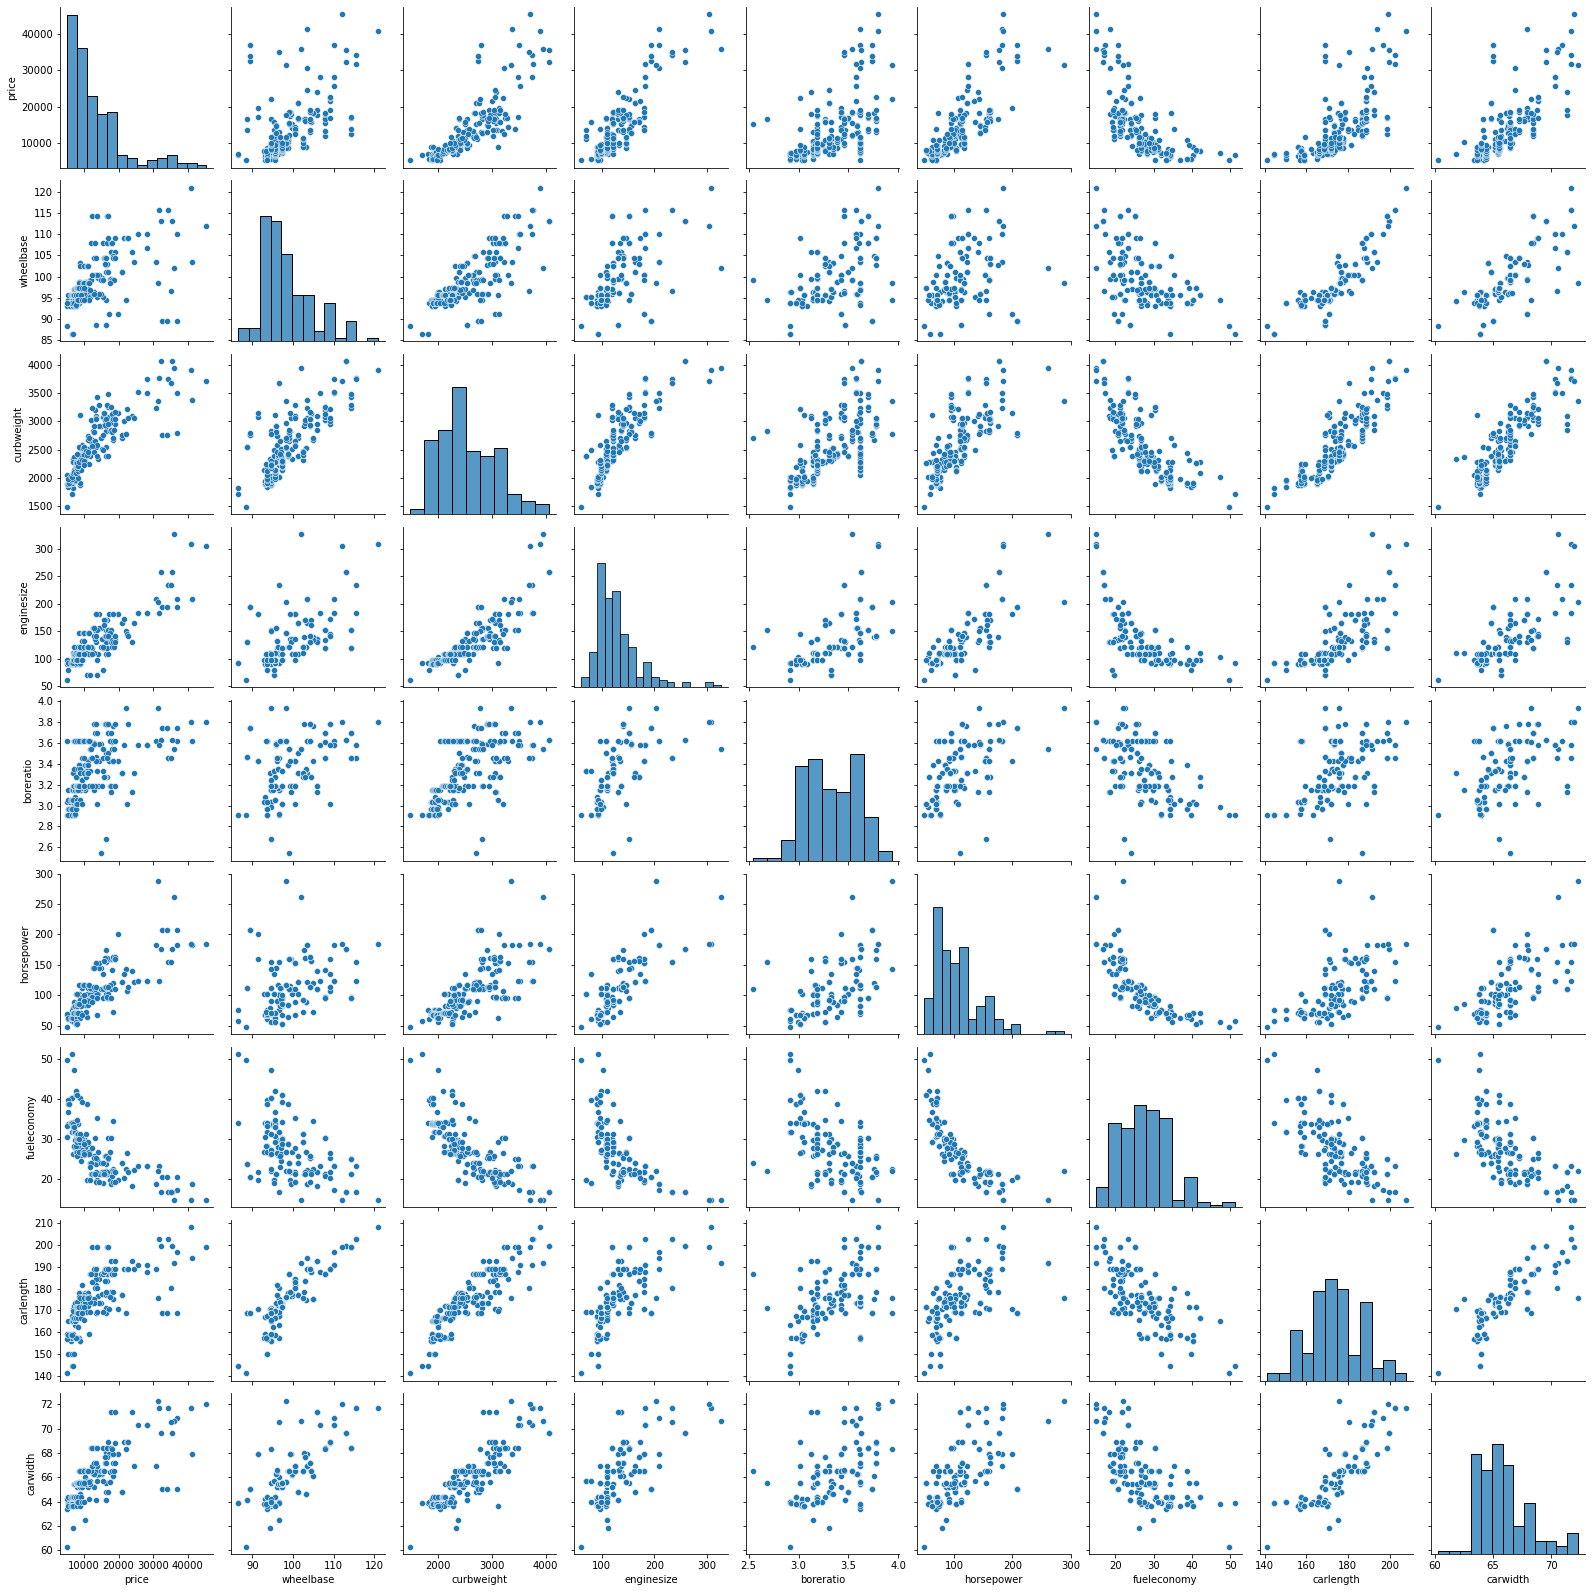

In [47]:
sns.pairplot(cars_lr)
plt.show()


##### __Train-Test Split and feature scaling__

In [48]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(cars_lr, train_size=0.7, test_size=0.3, random_state=100)

In [49]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower', 'fueleconomy', 'carlength', 'carwidth', 'price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [50]:
df_train.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,carsrange
122,0.068818,gas,std,sedan,fwd,0.244828,0.272692,ohc,four,0.139623,0.230159,0.083333,0.530864,0.426016,0.291667,Budget
125,0.466890,gas,std,hatchback,rwd,0.272414,0.500388,ohc,four,0.339623,1.000000,0.395833,0.213992,0.452033,0.666667,Highend
166,0.122110,gas,std,hatchback,rwd,0.272414,0.314973,dohc,four,0.139623,0.444444,0.266667,0.344307,0.448780,0.308333,Budget
1,0.314446,gas,std,convertible,rwd,0.068966,0.411171,dohc,four,0.260377,0.626984,0.262500,0.244170,0.450407,0.316667,Medium
199,0.382131,gas,turbo,wagon,rwd,0.610345,0.647401,ohc,four,0.260377,0.746032,0.475000,0.122085,0.775610,0.575000,Medium


In [51]:
df_train.describe()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.219309,0.411141,0.407878,0.241351,0.497946,0.227302,0.358265,0.525476,0.461655
std,0.215682,0.205581,0.211269,0.154619,0.207140,0.165511,0.185980,0.204848,0.184517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.067298,0.272414,0.245539,0.135849,0.305556,0.091667,0.198903,0.399187,0.304167
50%,0.140343,0.341379,0.355702,0.184906,0.500000,0.191667,0.344307,0.502439,0.425000
75%,0.313479,0.503448,0.559542,0.301887,0.682540,0.283333,0.512346,0.669919,0.550000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### __Heatmap__

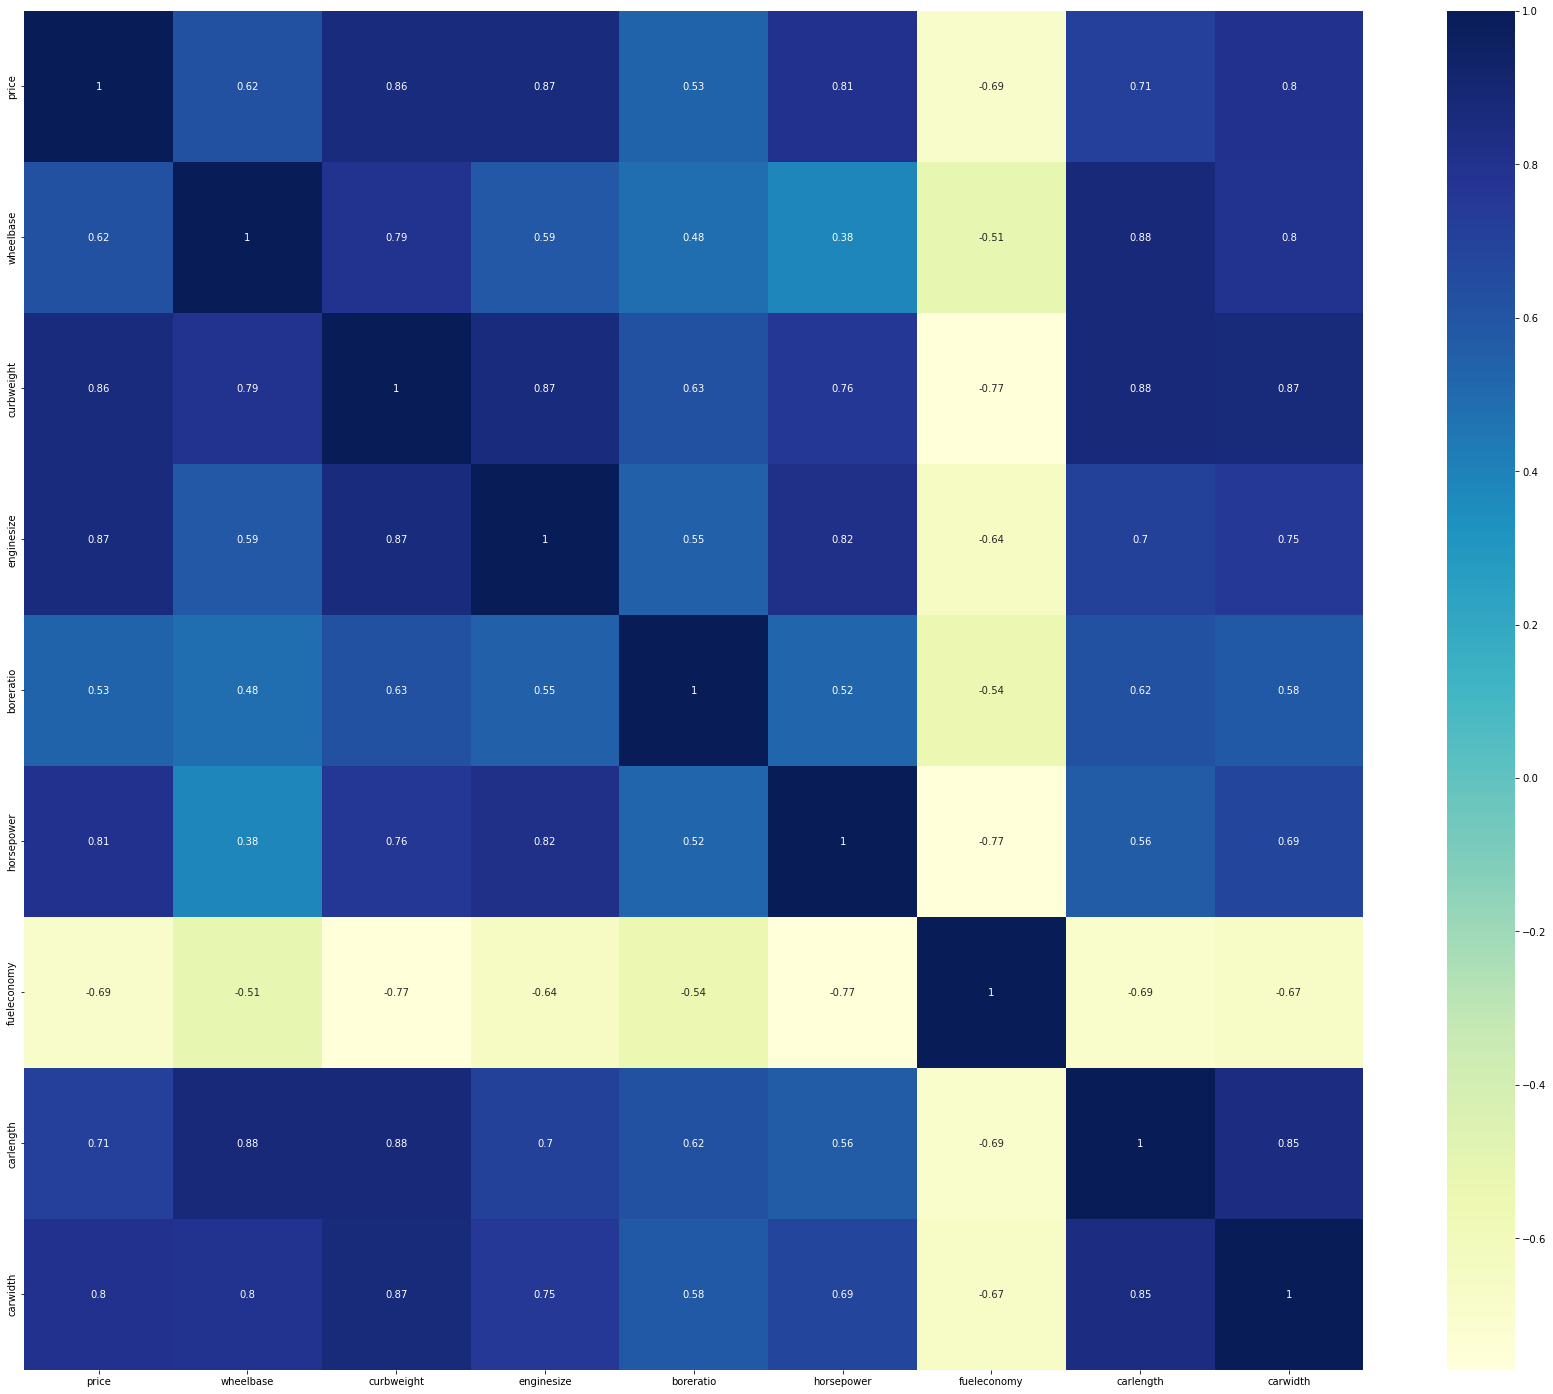

In [52]:
#Correlation using heatmap
plt.figure(figsize=(30, 25))
sns.heatmap(df_train.corr(), annot=True, cmap="YlGnBu")
plt.show()

<div style="color:grey">Highly correlated variables to price are - <code>curbweight, enginesize, horsepower, carwidth</code> and <code>highend<code>.</div>